In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

import sympy as sp
from pytc2.sistemas_lineales import analyze_sys,pzmap, GroupDelay, bodePlot
from pytc2.sistemas_lineales import plot_plantilla

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [ ]:
# from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s

from schemdraw import Drawing
from pytc2.dibujar import dibujar_espacio_derivacion, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada
from pytc2.general import to_latex

<img src="./logo_UTN.svg" align="right" width="150" /> 

### Teoría de Circuitos II
#### Barrionuevo Cecilia

# Tarea Semanal 4

Dado el siguiente circuito:

<img src="./TS4_plantilla_circuito.png"/> 
<img src="./TS4_plantilla_circuito.png"/> 

1. Utilizando el método de Storch ( pag. 403 del Schaumann ) obtener la T(s)Bessel de orden N = 2, 3 y 4 
2. Elegir la T(s) con el mínimo orden que cumple con αmáx=1dB
3. Evaluar el Retardo de Grupo  D(2.5). Expresar en forma porcentual [%] el error o desviamiento respecto a D(0)
4. Sintetizar el circuito normalizado con estructuras Sallen-Key con K=1 ( real. negativa unitaria )
<img src="./TS4_sallenkey.png"/> 


# Utilizando el método de Storch ( pag. 403 del Schaumann ) obtener la T(s)Bessel de orden N = 2, 3 y 4 

<img src="./1-7.jpg"/>
<img src="./2-7.jpg"/>
<img src="./3a-7.jpg"/>

$$T(s) = \frac{3}{s^2 + 3.s + 3} $$
$$T(s) = \frac{15}{s^3 + 6.s^2 + 15.s + 15} $$
$$T(s) = \frac{105}{s^4 + 10s^3 + 45.s^2 + 105.s + 105} $$

# Elegir la T(s) con el mínimo orden que cumple con αmáx=1dB


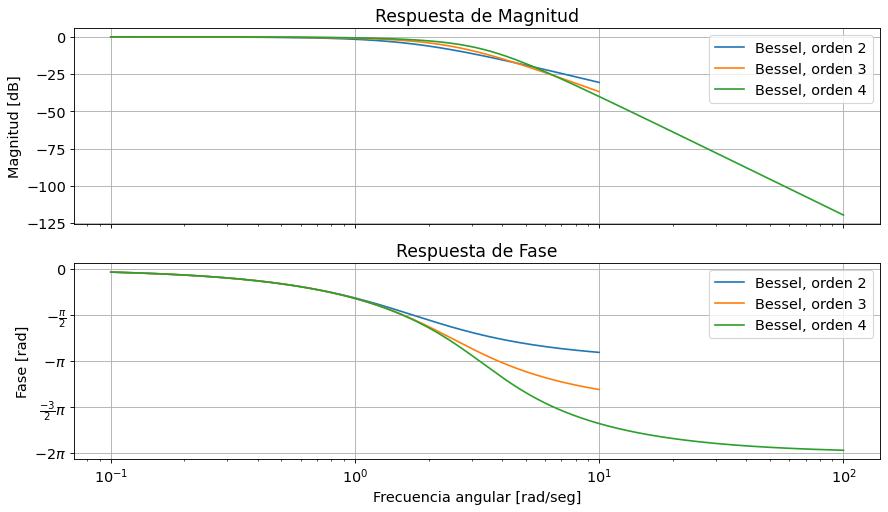

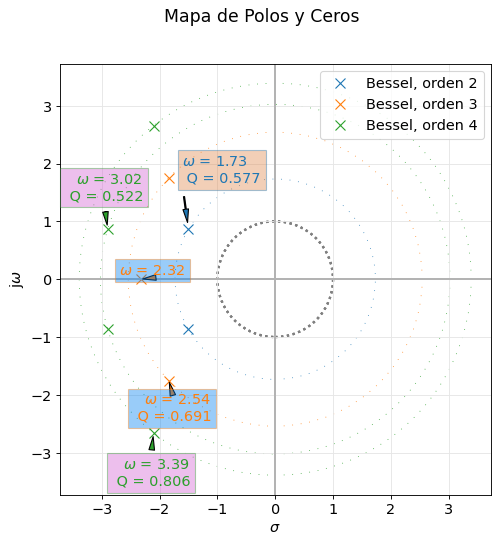

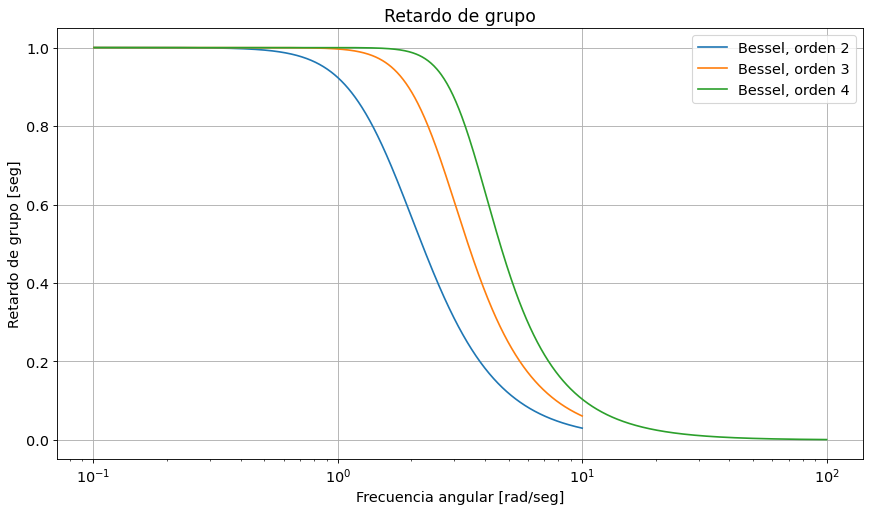

In [13]:
this_order = [2, 3, 4]

for order in this_order:
      z,p,k = sig.besselap(order, norm='delay')
      num, den = sig.zpk2tf(z,p,k)
      this_lti = sig.ZerosPolesGain(z, p ,k).to_tf()
      #plt.figure(1)
      
      this_label = 'Bessel, orden ' + str(order)
        
      analyze_sys ([this_lti],  this_label)  


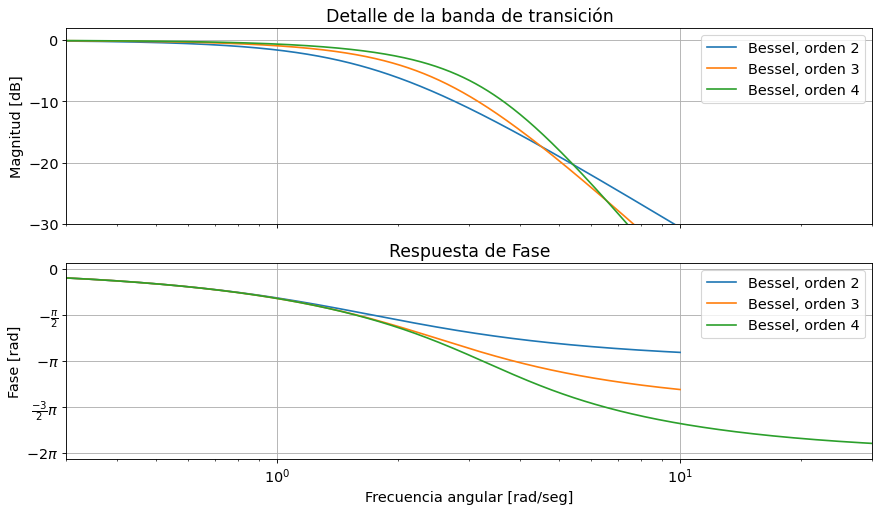

In [14]:
this_order = [2, 3, 4]

for order in this_order:
      z,p,k = sig.besselap(order, norm='delay')
      num, den = sig.zpk2tf(z,p,k)
      this_lti = sig.ZerosPolesGain(z, p ,k).to_tf()
      #plt.figure(1)
      
      this_label = 'Bessel, orden ' + str(order)

      asy_axes = analyze_sys( [this_lti], this_label )
      plt.close(2)
      plt.close(3)
      plt.close(4)

      plt.sca(asy_axes[0][1][0])
      plt.ylim(np.array([-30, 2.]) )
      plt.xlim(np.array([3. * 10.**-1, 3. * 10.**1]) )
      _ = plt.title('Detalle de la banda de transición')

<img src="./TS4_punto2.jpg"/> 

A partir del gráfico, determinamos un orden 3 para la implementacion del filtro

$$T(s) = \frac{15}{s^3 + 6.s^2 + 15.s + 15} $$

# Evaluar el Retardo de Grupo  D(2.5). Expresar en forma porcentual [%] el error o desviamiento respecto a D(0)

<img src="./3b-7.jpg"/>
<img src="./4-7.jpg"/>
<img src="./5a-7.jpg"/>


# Sintetizar el circuito normalizado con estructuras Sallen-Key con K=1 ( real. negativa unitaria )

<img src="./5b-7.jpg"/>
<img src="./6-7.jpg"/>
<img src="./7-7.jpg"/>